Found 1472 images belonging to 3 classes.
Found 367 images belonging to 3 classes.


C:\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/20


C:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 270s 5s/step - accuracy: 0.5774 - loss: 2.5018 - val_accuracy: 0.8267 - val_loss: 1.0690
Epoch 2/20


C:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 2.4917
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 269s 5s/step - accuracy: 0.8801 - loss: 0.6683 - val_accuracy: 0.7841 - val_loss: 1.3303
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8000 - val_loss: 1.5149
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 263s 5s/step - accuracy: 0.9251 - loss: 0.4417 - val_accuracy: 0.8324 - val_loss: 1.1098
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8667 - val_loss: 1.0745
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 267s 5s/step - accuracy: 0.8979 - loss: 0.6472 - val_accuracy: 0.8125 - val_loss: 1.3208
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8667 - val_loss: 0.8954
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 261s 5s/step - accuracy: 0.9203 - loss: 0.4622 - val

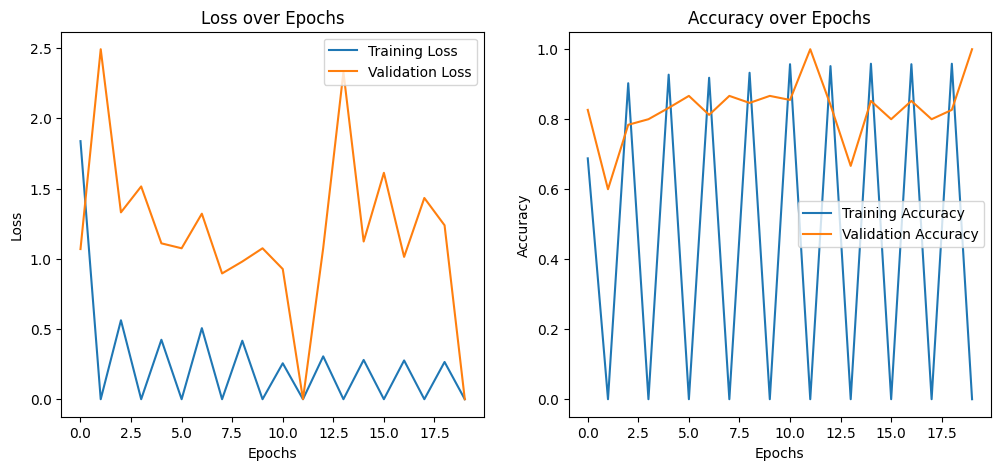

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


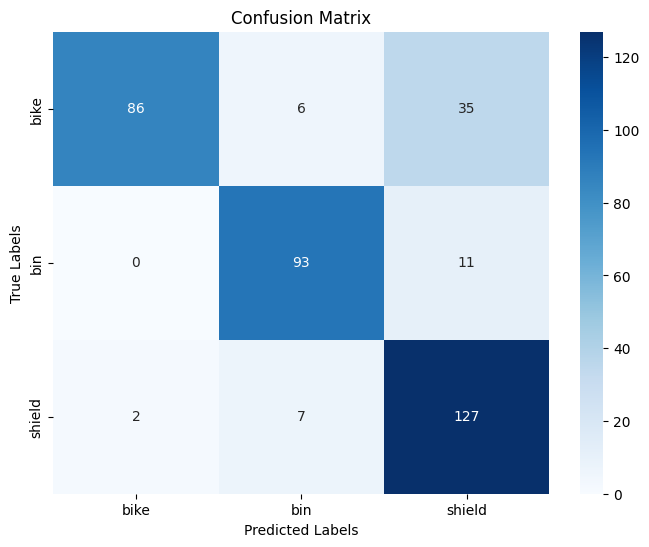

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=C:\Users\Soyoung\Desktop\cnn\weightedloss\VGG16_model\VGG16_model_2024-09-20_13-34-38.

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from datetime import datetime
import json
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Set project and data paths
project_root_path = os.path.abspath(".")
data_root_path = os.path.join("C:\\Users\\Soyoung\\Desktop\\data")

# Check if the dataset path exists
if not os.path.exists(data_root_path):
    raise FileNotFoundError(f"Dataset folder not found: {data_root_path}")

# Enable GPU memory growth to avoid OOM errors
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

# Hyperparameters
EPOCHS = 20
BATCH_SIZE = 32
IMAGE_SIZE = (128, 128)
INITIAL_LEARNING_RATE = 0.0001
NUM_CLASSES = 3  # (bike, bin, shield)

# Greyscale augmentation function
def random_grayscale(image):
    if np.random.rand() < 0.25:  # 25% chance of applying grayscale
        image = np.dot(image[..., :3], [0.299, 0.587, 0.114])  # RGB to grayscale conversion
        image = np.stack((image,) * 3, axis=-1)  # Convert grayscale to 3 channels
    return image

# Training data generator
train_datagen = ImageDataGenerator(
    preprocessing_function=random_grayscale,
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Validation data generator
validation_datagen = ImageDataGenerator(
    preprocessing_function=random_grayscale,
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    validation_split=0.2
)

# Load training dataset into generator
train_generator = train_datagen.flow_from_directory(
    data_root_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=321
)

# Load validation dataset into generator
validation_generator = validation_datagen.flow_from_directory(
    data_root_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=321
)

# Fit data generators
batch_images_train, _ = next(train_generator)
batch_images_val, _ = next(validation_generator)
train_datagen.fit(batch_images_train)
validation_datagen.fit(batch_images_val)

# VGG16 base model
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[0], 3),
)
base_model.trainable = False

# Create new model on top of VGG16
flat = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(units=256, use_bias=False, activation="relu")(flat)
x = tf.keras.layers.Dense(units=128, use_bias=False, activation="relu")(x)  # Corrected to x
outputs = tf.keras.layers.Dense(units=NUM_CLASSES, use_bias=False, activation="softmax")(x)
model = tf.keras.Model(base_model.inputs, outputs)

# Weighted categorical crossentropy
def weighted_categorical_crossentropy(weights):
    weights = tf.constant(weights, dtype=tf.float32)
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
        cross_entropy = y_true * tf.math.log(y_pred)
        weighted_cross_entropy = cross_entropy * weights
        return -tf.reduce_mean(weighted_cross_entropy)
    return loss

# Define custom weights for each class
class_weights = [1.5, 1.0, 1.5]

# Learning rate decay
cosine_decay = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=INITIAL_LEARNING_RATE,
    decay_steps=(train_generator.n // BATCH_SIZE) * EPOCHS
)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=cosine_decay),
    loss=weighted_categorical_crossentropy(class_weights),
    metrics=['accuracy']
)

# Training
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Plot training & validation loss and accuracy
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig(os.path.join(project_root_path, 'loss_accuracy.png'))  # Save loss and accuracy graph
plt.show()

# Confusion matrix evaluation
true_labels = []
predicted_labels = []
for i in range(len(validation_generator)):
    batch = validation_generator[i]
    true_batch_labels = batch[1]
    predicted_batch_labels = np.argmax(model.predict(batch[0]), axis=-1)
    true_labels.extend(np.argmax(true_batch_labels, axis=-1))
    predicted_labels.extend(predicted_batch_labels)

# Compute and plot confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig(os.path.join(project_root_path, 'confusion_matrix.png'))
plt.show()

# Save the model and training metadata
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
saved_model_dir = os.path.join(project_root_path, "VGG16_model", f"VGG16_model_{timestamp}")
os.makedirs(saved_model_dir, exist_ok=True)
model.save(saved_model_dir)

# Save class names to JSON
class_names = {v: k for k, v in train_generator.class_indices.items()}
with open(os.path.join(saved_model_dir, 'class_names.json'), 'w') as f:
    json.dump(class_names, f)

print(f"Model and class names saved to {saved_model_dir}")


Found 1472 images belonging to 3 classes.
Found 367 images belonging to 3 classes.


C:\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/10


C:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 295s 6s/step - accuracy: 0.2656 - loss: 5.8776 - val_accuracy: 0.2841 - val_loss: 5.7695
Epoch 2/10


C:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2667 - val_loss: 5.9100
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 260s 5s/step - accuracy: 0.2984 - loss: 5.6546 - val_accuracy: 0.2869 - val_loss: 5.7467
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2000 - val_loss: 6.4472
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 270s 5s/step - accuracy: 0.2731 - loss: 5.8585 - val_accuracy: 0.2869 - val_loss: 5.7467
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2000 - val_loss: 6.4472
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 267s 5s/step - accuracy: 0.2636 - loss: 5.9349 - val_accuracy: 0.2784 - val_loss: 5.8153
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4000 - val_loss: 4.8354
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 277s 6s/step - accuracy: 0.2823 - loss: 5.7838 - val

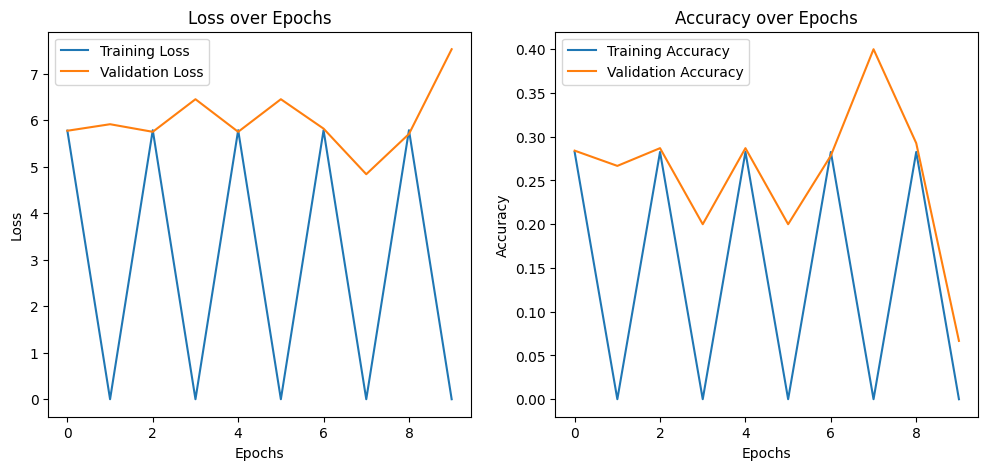

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step


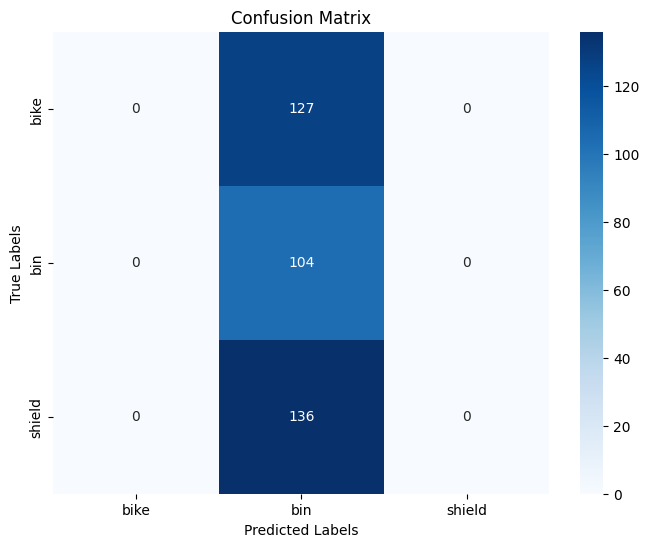

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=C:\Users\Soyoung\Desktop\cnn\weightedloss\VGG16_model\VGG16_model_2024-09-20_14-19-16.

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from datetime import datetime
import json
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Set project and data paths
project_root_path = os.path.abspath(".")
data_root_path = os.path.join("C:\\Users\\Soyoung\\Desktop\\data")

# Check if the dataset path exists
if not os.path.exists(data_root_path):
    raise FileNotFoundError(f"Dataset folder not found: {data_root_path}")

# Enable GPU memory growth to avoid OOM errors
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

# Hyperparameters
EPOCHS = 10
BATCH_SIZE = 32
IMAGE_SIZE = (128, 128)
INITIAL_LEARNING_RATE = 0.001
NUM_CLASSES = 3  # (bike, bin, shield)

# Greyscale augmentation function
def random_grayscale(image):
    if np.random.rand() < 0.25:  # 25% chance of applying grayscale
        image = np.dot(image[..., :3], [0.299, 0.587, 0.114])  # RGB to grayscale conversion
        image = np.stack((image,) * 3, axis=-1)  # Convert grayscale to 3 channels
    return image

# Training data generator
train_datagen = ImageDataGenerator(
    preprocessing_function=random_grayscale,
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Validation data generator
validation_datagen = ImageDataGenerator(
    preprocessing_function=random_grayscale,
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    validation_split=0.2
)

# Load training dataset into generator
train_generator = train_datagen.flow_from_directory(
    data_root_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=321
)

# Load validation dataset into generator
validation_generator = validation_datagen.flow_from_directory(
    data_root_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=321
)

# Fit data generators
batch_images_train, _ = next(train_generator)
batch_images_val, _ = next(validation_generator)
train_datagen.fit(batch_images_train)
validation_datagen.fit(batch_images_val)

# VGG16 base model
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[0], 3),
)
base_model.trainable = False

# Create new model on top of VGG16
flat = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(units=256, use_bias=False, activation="relu")(flat)
x = tf.keras.layers.Dense(units=128, use_bias=False, activation="relu")(x)  # Corrected to x
outputs = tf.keras.layers.Dense(units=NUM_CLASSES, use_bias=False, activation="softmax")(x)
model = tf.keras.Model(base_model.inputs, outputs)

# Weighted categorical crossentropy
def weighted_categorical_crossentropy(weights):
    weights = tf.constant(weights, dtype=tf.float32)
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
        cross_entropy = y_true * tf.math.log(y_pred)
        weighted_cross_entropy = cross_entropy * weights
        return -tf.reduce_mean(weighted_cross_entropy)
    return loss

# Define custom weights for each class
class_weights = [1.5, 1.0, 1.5]

# Learning rate decay
cosine_decay = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=INITIAL_LEARNING_RATE,
    decay_steps=(train_generator.n // BATCH_SIZE) * EPOCHS
)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=cosine_decay),
    loss=weighted_categorical_crossentropy(class_weights),
    metrics=['accuracy']
)

# Training
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Plot training & validation loss and accuracy
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig(os.path.join(project_root_path, 'loss_accuracy.png'))  # Save loss and accuracy graph
plt.show()

# Confusion matrix evaluation
true_labels = []
predicted_labels = []
for i in range(len(validation_generator)):
    batch = validation_generator[i]
    true_batch_labels = batch[1]
    predicted_batch_labels = np.argmax(model.predict(batch[0]), axis=-1)
    true_labels.extend(np.argmax(true_batch_labels, axis=-1))
    predicted_labels.extend(predicted_batch_labels)

# Compute and plot confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig(os.path.join(project_root_path, 'confusion_matrix.png'))
plt.show()

# Save the model and training metadata
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
saved_model_dir = os.path.join(project_root_path, "VGG16_model", f"VGG16_model_{timestamp}")
os.makedirs(saved_model_dir, exist_ok=True)
model.save(saved_model_dir)

# Save class names to JSON
class_names = {v: k for k, v in train_generator.class_indices.items()}
with open(os.path.join(saved_model_dir, 'class_names.json'), 'w') as f:
    json.dump(class_names, f)

print(f"Model and class names saved to {saved_model_dir}")


Found 1472 images belonging to 3 classes.
Found 367 images belonging to 3 classes.


C:\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/25


C:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 264s 5s/step - accuracy: 0.3745 - loss: 4.0641 - val_accuracy: 0.5398 - val_loss: 2.8170
Epoch 2/25


C:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 2.2844
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 264s 5s/step - accuracy: 0.5608 - loss: 2.7122 - val_accuracy: 0.6222 - val_loss: 2.3354
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5333 - val_loss: 2.8418
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 265s 5s/step - accuracy: 0.6561 - loss: 2.0642 - val_accuracy: 0.6648 - val_loss: 1.9941
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8667 - val_loss: 0.6394
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 272s 6s/step - accuracy: 0.7488 - loss: 1.4876 - val_accuracy: 0.7102 - val_loss: 1.7221
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5333 - val_loss: 2.5184
Epoch 9/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 269s 5s/step - accuracy: 0.7866 - loss: 1.3248 - val

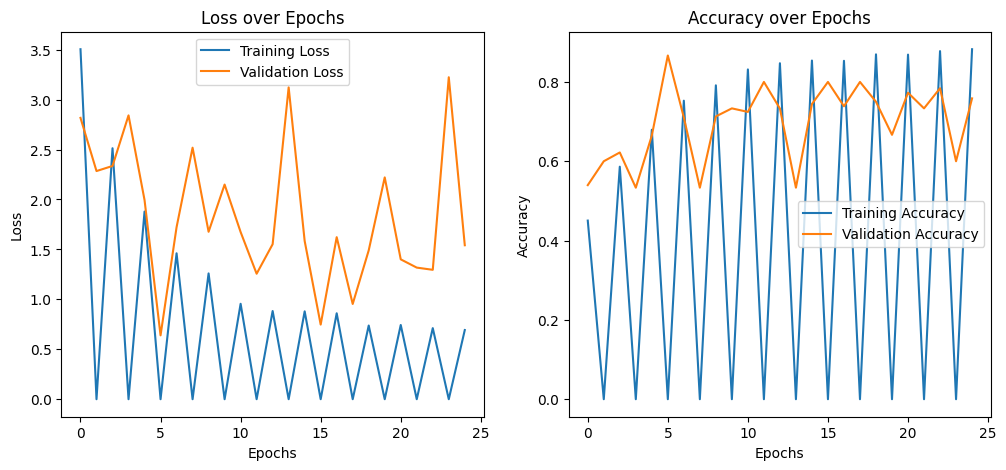

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step


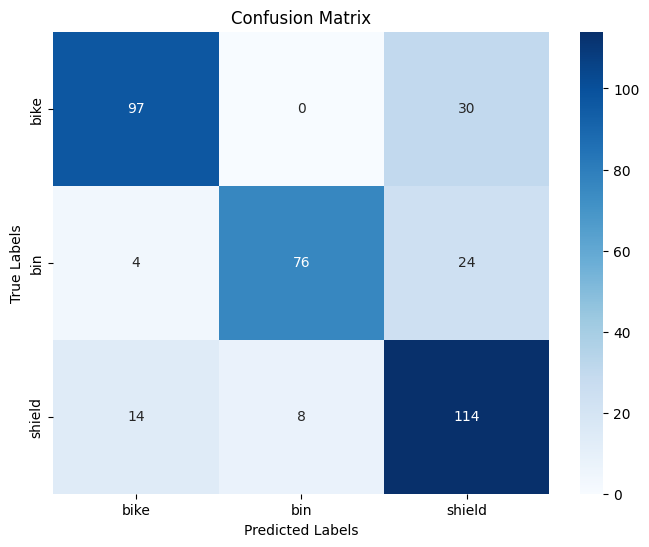

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=C:\Users\Soyoung\Desktop\cnn\weightedloss\VGG16_model\VGG16_model_2024-09-20_15-20-58.

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from datetime import datetime
import json
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Set project and data paths
project_root_path = os.path.abspath(".")
data_root_path = os.path.join("C:\\Users\\Soyoung\\Desktop\\data")

# Check if the dataset path exists
if not os.path.exists(data_root_path):
    raise FileNotFoundError(f"Dataset folder not found: {data_root_path}")

# Enable GPU memory growth to avoid OOM errors
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

# Hyperparameters
EPOCHS = 25
BATCH_SIZE = 32
IMAGE_SIZE = (128, 128)
INITIAL_LEARNING_RATE = 0.00001
NUM_CLASSES = 3  # (bike, bin, shield)

# Greyscale augmentation function
def random_grayscale(image):
    if np.random.rand() < 0.25:  # 25% chance of applying grayscale
        image = np.dot(image[..., :3], [0.299, 0.587, 0.114])  # RGB to grayscale conversion
        image = np.stack((image,) * 3, axis=-1)  # Convert grayscale to 3 channels
    return image

# Training data generator
train_datagen = ImageDataGenerator(
    preprocessing_function=random_grayscale,
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Validation data generator
validation_datagen = ImageDataGenerator(
    preprocessing_function=random_grayscale,
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    validation_split=0.2
)

# Load training dataset into generator
train_generator = train_datagen.flow_from_directory(
    data_root_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=321
)

# Load validation dataset into generator
validation_generator = validation_datagen.flow_from_directory(
    data_root_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=321
)

# Fit data generators
batch_images_train, _ = next(train_generator)
batch_images_val, _ = next(validation_generator)
train_datagen.fit(batch_images_train)
validation_datagen.fit(batch_images_val)

# VGG16 base model
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[0], 3),
)
base_model.trainable = False

# Create new model on top of VGG16
flat = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(units=256, use_bias=False, activation="relu")(flat)
x = tf.keras.layers.Dense(units=128, use_bias=False, activation="relu")(x)  # Corrected to x
outputs = tf.keras.layers.Dense(units=NUM_CLASSES, use_bias=False, activation="softmax")(x)
model = tf.keras.Model(base_model.inputs, outputs)

# Weighted categorical crossentropy
def weighted_categorical_crossentropy(weights):
    weights = tf.constant(weights, dtype=tf.float32)
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
        cross_entropy = y_true * tf.math.log(y_pred)
        weighted_cross_entropy = cross_entropy * weights
        return -tf.reduce_mean(weighted_cross_entropy)
    return loss

# Define custom weights for each class
class_weights = [1.5, 1.0, 1.5]

# Learning rate decay
cosine_decay = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=INITIAL_LEARNING_RATE,
    decay_steps=(train_generator.n // BATCH_SIZE) * EPOCHS
)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=cosine_decay),
    loss=weighted_categorical_crossentropy(class_weights),
    metrics=['accuracy']
)

# Training
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Plot training & validation loss and accuracy
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig(os.path.join(project_root_path, 'loss_accuracy.png'))  # Save loss and accuracy graph
plt.show()

# Confusion matrix evaluation
true_labels = []
predicted_labels = []
for i in range(len(validation_generator)):
    batch = validation_generator[i]
    true_batch_labels = batch[1]
    predicted_batch_labels = np.argmax(model.predict(batch[0]), axis=-1)
    true_labels.extend(np.argmax(true_batch_labels, axis=-1))
    predicted_labels.extend(predicted_batch_labels)

# Compute and plot confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig(os.path.join(project_root_path, 'confusion_matrix.png'))
plt.show()

# Save the model and training metadata
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
saved_model_dir = os.path.join(project_root_path, "VGG16_model", f"VGG16_model_{timestamp}")
os.makedirs(saved_model_dir, exist_ok=True)
model.save(saved_model_dir)

# Save class names to JSON
class_names = {v: k for k, v in train_generator.class_indices.items()}
with open(os.path.join(saved_model_dir, 'class_names.json'), 'w') as f:
    json.dump(class_names, f)

print(f"Model and class names saved to {saved_model_dir}")


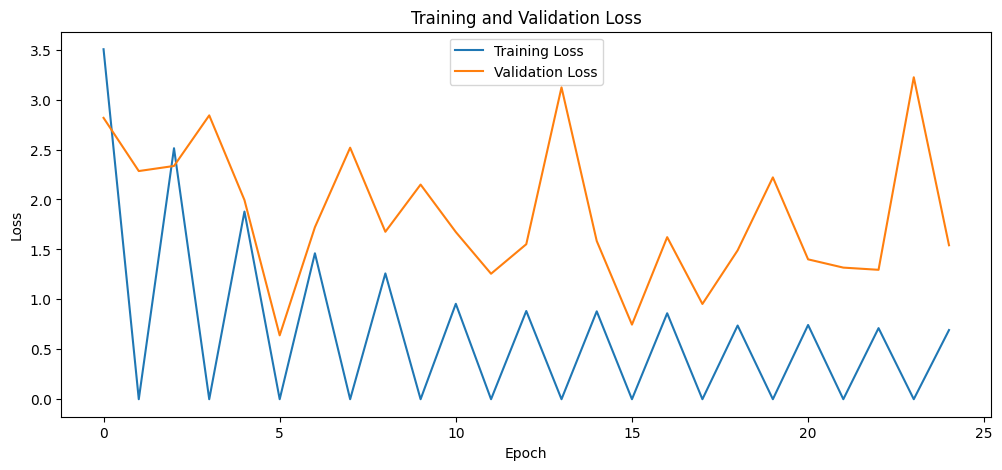

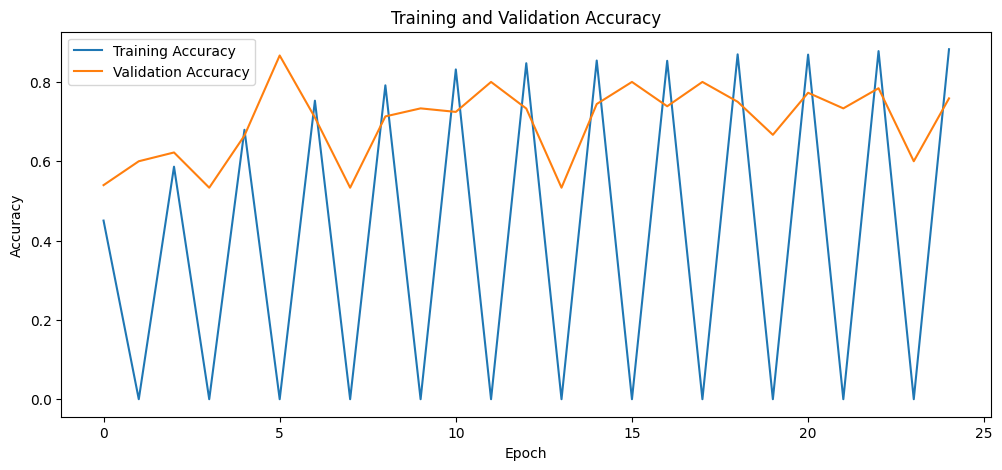

In [4]:
# Plot Training and Validation Loss and save
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.savefig(os.path.join(project_root_path, 'training_validation_loss.png'))  # Save plot as file
plt.show()

# Plot Training and Validation Accuracy and save
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.savefig(os.path.join(project_root_path, 'training_validation_accuracy.png'))  # Save plot as file
plt.show()